In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('lake_track_waypoints.csv')

In [5]:
df

,x,y
0,179.30830,98.671020
1,172.30830,117.181000
2,165.57350,127.289400
3,151.74830,140.371000
4,133.47830,150.771000
5,114.80830,156.621000
6,103.89350,158.429400
7,94.21827,158.891000
8,85.37355,158.731000
9,70.40827,157.101000


In [6]:
# 42["telemetry",
{"ptsx":[-32.16173,-43.49173,-61.09,-78.29172,-93.05002,-107.7717],
 "ptsy":[113.361,105.941,92.88499,78.73102,65.34102,50.57938],
 "psi_unity":4.12033,
 "psi":3.733651,
 "x":-40.62,
 "y":108.73,
 "steering_angle":0,
 "throttle":0,
 "speed":0}]


SyntaxError: invalid syntax (<ipython-input-6-8aba655fba71>, line 10)

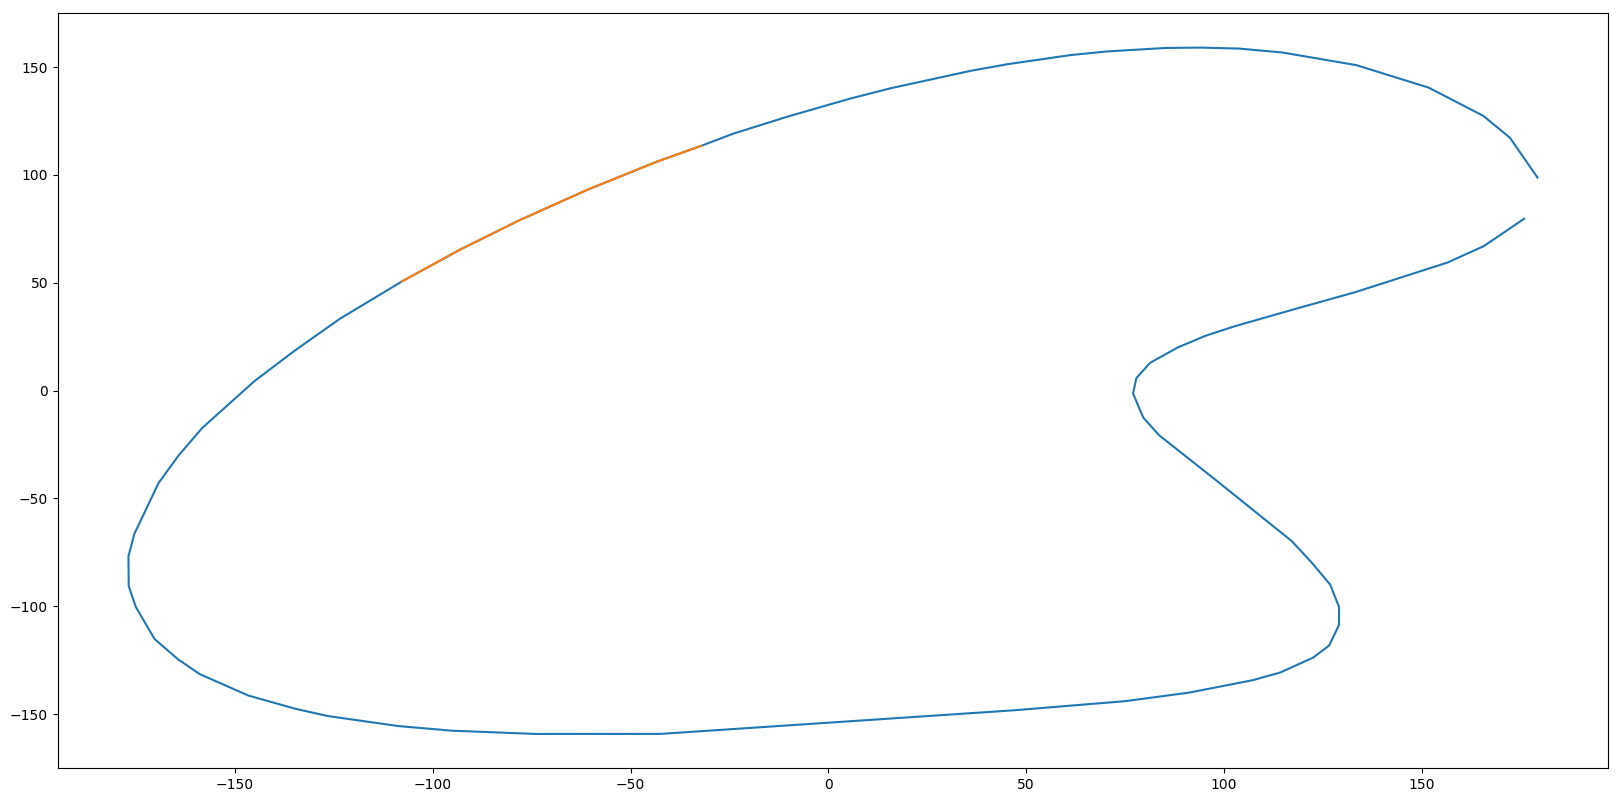

In [7]:
plt.plot(
    df.x, df.y,
    [-32.16173,-43.49173,-61.09,-78.29172,-93.05002,-107.7717], [113.361,105.941,92.88499,78.73102,65.34102,50.57938]
);

The trajectory is given by a quadratic polynomial

\begin{align}
f(x) & = a_0 + a_1 x + a_2 x^2 \\
\end{align}

The coordinate system has origin at the car center with x axis pointing forward and y axis pointing left. 

Model state: [$x_t$, $y_t$, $\psi_t$, $v_t$, $cte_t$, $\psi err_t$]. 

Here $x_t$ and $y_t$ are vehicle coordinates in meters, $\psi_t$ is the heading as angle in radians counted counter-clockwise from $x$ axis, $v_t$ is speed in meters/second. 

$cte_t$ is cross-track error calculated as distance from car center to the ideal point on the trajectory. $\psi err_t$ is heading error. Given parametric form of our ideal trajectory we can express the errors through the other state variables as follows:

\begin{align}
cte_t & = cte(x_t) = f(x_t) - y_t = a_0 + a_1 x_t + a_2 x_t^2 - y_t \\
\psi err_t & = \psi_t - \psi des_t = \psi_t - \psi des(x_t) = \psi_t - \arctan f'(x_t) = \psi_t - \arctan (a_1 + 2 a_2 x_t) \\
\end{align}


Actuators: [$\delta_t$, $a_t$]. 

Here $\delta_t$ is steering angle in radians and $a_t$ is acceleration/throttle.

We use the following kinematic model:

\begin{align}
x_{t+1} & = x_t + v_t \cos(ψ_t) \Delta t \\
y_{t+1} & = y_t + v_t \sin(ψ_t) \Delta t \\
\psi_{t+1} & = \psi_t + \frac{v_t}{L_f} \delta_t \Delta t \\
v_{t+1} & = v_t + a_t \Delta t \\
\end{align}

